# Schrodinger's Equation

## References -- move to bottom
* Atkins & Friedman (Molecular Quantum Mechanics textbook)
* Barba, Lorena A., et al. "MAE 6286 Practical Numerical Methods with Python." The George Washington University. http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about. 2014
* http://arxiv.org/pdf/0704.3240.pdf

Wave functions are used in quantum mechanics to describe the position of a particle at a certain time. The fundamental equation used to solve these wave functions is the Schrodinger equation. 

\begin{equation}
i\hbar\frac{\partial}{\partial t}\psi(x, t) = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}\psi(x, t)
\end{equation}

Discretized Equation:

\begin{eqnarray}
i\hbar\frac{\psi^{n+1}_i - \psi^n_i}{\Delta t} = \frac{\hbar^2}{2m} \cdot \frac{1}{2} &\left( 
\frac{\psi^{n+1}_{i+1} - 2\psi^{n+1}_i + \psi^{n+1}_{i-1}}{\Delta x^2} 
+ \frac{\psi^n_{i+1}-2\psi^n_i + \psi^n_{i-1}}{\Delta x^2}
\right)
\end{eqnarray}

In [1]:
import numpy
from scipy.linalg import solve
from scipy.interpolate import spline
from matplotlib import pyplot
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [12]:
def generateMatrix(N, sigma):
   
    ##We need a TRIDIAGONAL MATRIX!!

    # Set Diagonalfrom discritization
    d = numpy.diag(numpy.ones(N-2)*(1+2j/sigma))
       
    # Set Upper Diagonal
    ud = numpy.diag(numpy.ones(N-3)*-2j, 1)
        
    # Set Lower Diagonal
    ld = numpy.diag(numpy.ones(N-3)*-2j, -1)
        
    A = d + ud + ld
    
    return A                   

In [13]:
#This is what we know

def genRHS(psi, sigma): 
    
    x = psi[1:-1]*((2j/sigma)-1) + psi[:-2] + psi[2:]
    
    #Dirichlet boundary conditions
    x[0] += psi[0]
    x[-1] += psi[0]
    
    return x

In [14]:
def CrankNicolson(psi, A, nt, sigma):
    
    for t in range(nt):
        psi_n = psi.copy()
        x = genRHS(psi_n, sigma)
        
        psi_inside = solve(A, x)
        psi[1:-1] = psi_inside
        
    return psi

In [15]:
L = 1
nx = 21 #21

h = 6.62607004e-34 #[m^2*kg/s]
hbar = h/(2*numpy.pi)
m = 6.6464764063e-27 #[kg] - mass of Helium ion
dx = L/(nx-1)


psi_i = numpy.zeros(nx, dtype = numpy.complex)
psi_i[0] = 1

sigma = 0.5 #0.5
#dt = sigma*(dx**2)*m/hbar
dt=1e-5

nt = 10

A = generateMatrix(nx, sigma)

print(dt)

1e-05


In [16]:
#print(A)

In [17]:
psi = CrankNicolson(psi_i.copy(), A, nt, sigma)

print(psi)

[  1.00000000e+00    +0.j          -2.60308540e+03 +4047.49574566j
  -4.84055383e+03 +6863.84570154j  -6.43019906e+03 +7357.55313687j
  -7.20134167e+03 +4763.70970931j  -7.05265864e+03 -1124.5209804j
  -5.90366816e+03 -9740.42788325j  -3.70756005e+03-19675.57334193j
  -5.38672434e+02-28880.54913252j   3.30208841e+03-35152.46223145j
   7.25088500e+03-36777.76037329j   1.05704207e+04-33093.88688708j
   1.25535111e+04-24740.7287043j    1.27647973e+04-13495.61080846j
   1.12178689e+04 -1759.72464961j   8.40470967e+03 +8101.37701225j
   5.14904922e+03+14329.3238476j    2.32420161e+03+16097.77240217j
   5.35907282e+02+13558.72713964j  -1.02434857e+02 +7682.71294136j
   0.00000000e+00    +0.j        ]


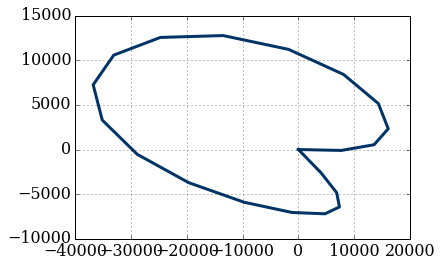

In [18]:
x = numpy.linspace(0,L,nx)

pyplot.plot(psi.imag, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

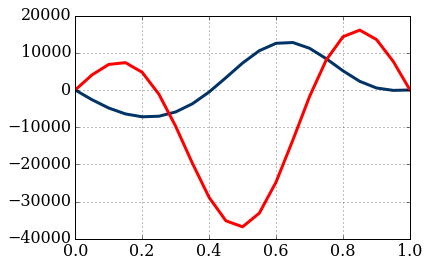

In [19]:
pyplot.plot(x, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)
pyplot.plot(x, psi.imag, color='r', ls='-', lw=3);
pyplot.grid(True)

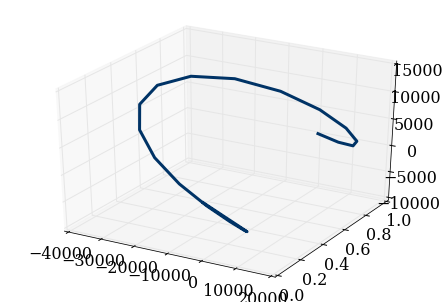

In [20]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.view_init()

ax.plot(psi.imag, x, psi.real, color = '#003366', lw =3)


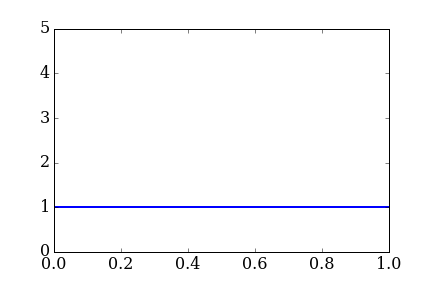
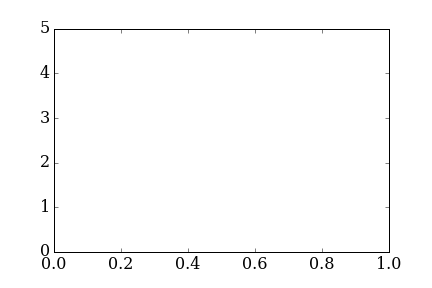
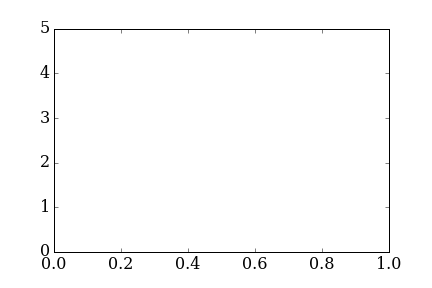
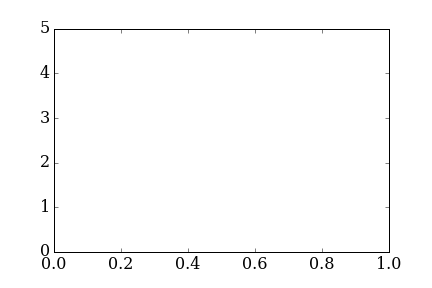
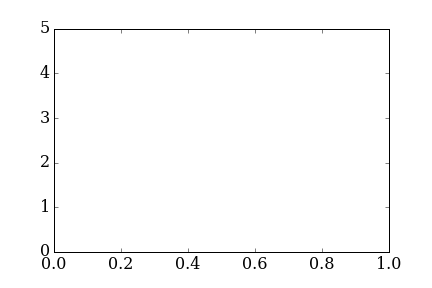
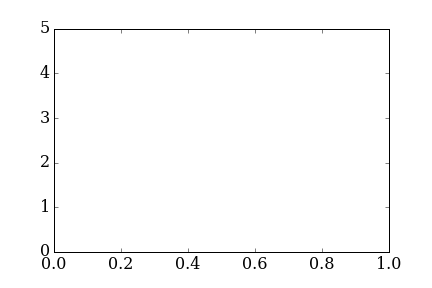
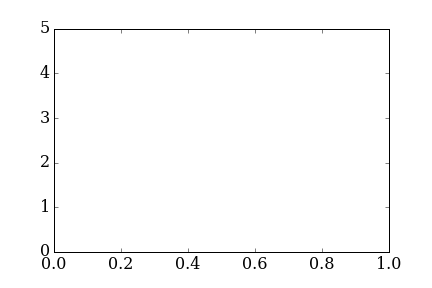
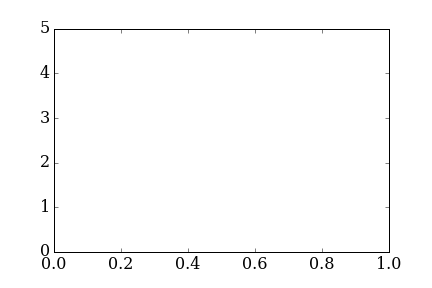
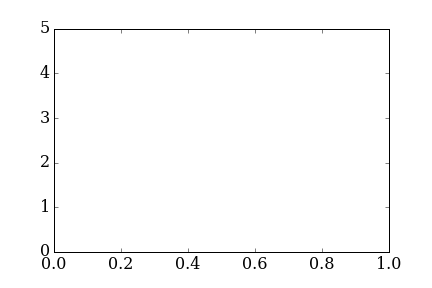
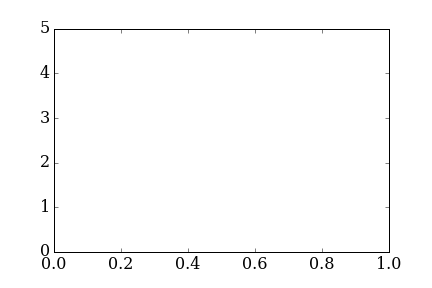
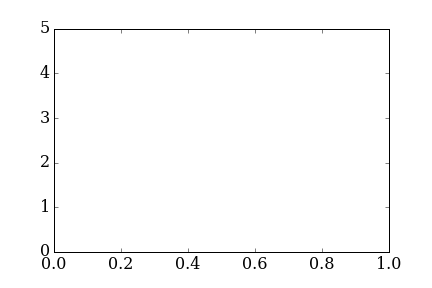
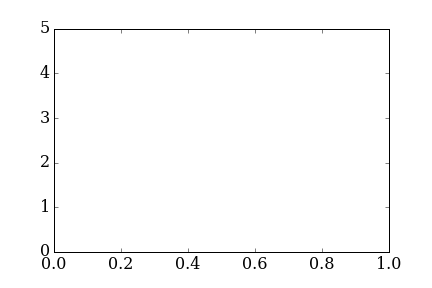
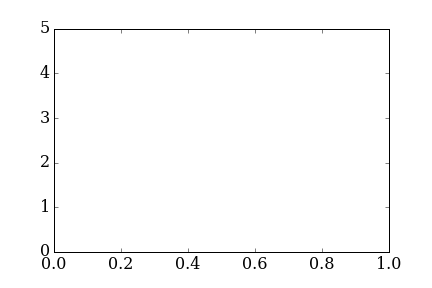
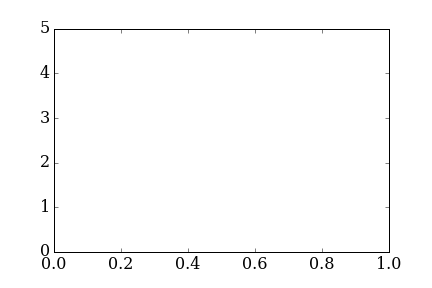
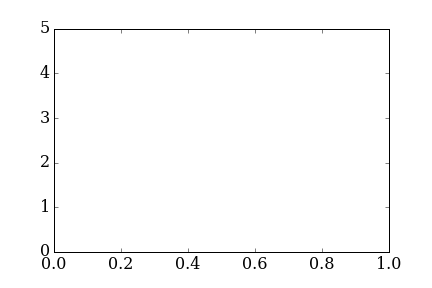
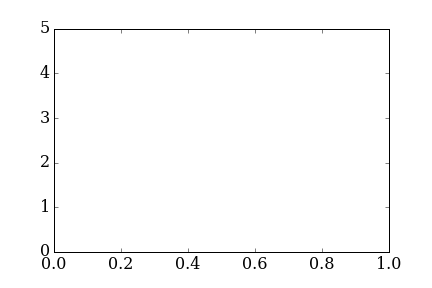
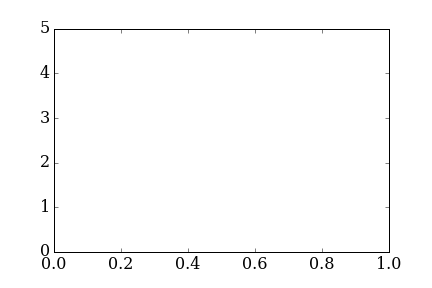
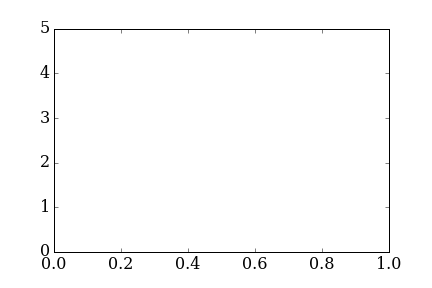
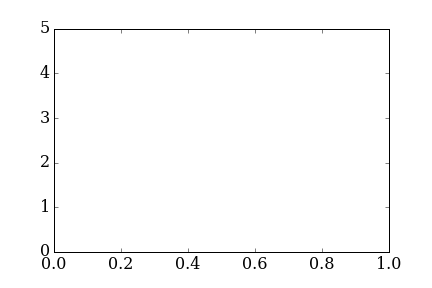
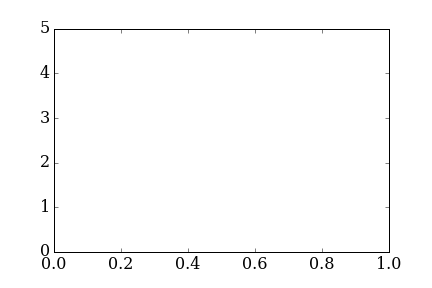
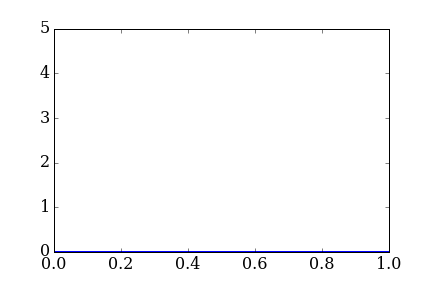

In [11]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

fig = pyplot.figure();
ax = pyplot.axes(xlim = (0,L), ylim = (0,5))
line, = ax.plot([],[],lw = 2)

def animate(data):
    x = numpy.linspace(0, L, nx)
    y = data
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = psi.real, interval = 50)

display_animation(anim, default_mode = 'once')


In [12]:
psi_conj = numpy.conj(psi)
probfunc = psi_conj*psi

#print(psi_conj)
#print()
print(probfunc)
probfunc_real = probfunc.real
print(probfunc_real)

[  1.00000000e+00+0.j   5.69124503e+08+0.j   1.66697283e+09+0.j
   2.08711946e+09+0.j   1.45488714e+09+0.j   1.33109021e+09+0.j
   4.75139561e+09+0.j   1.38899229e+10+0.j   2.73265440e+10+0.j
   3.95527233e+10+0.j   4.40695146e+10+0.j   3.81359006e+10+0.j
   2.51240783e+10+0.j   1.21833348e+10+0.j   5.09745493e+09+0.j
   4.63425617e+09+0.j   7.07796814e+09+0.j   7.93731928e+09+0.j
   5.53081521e+09+0.j   1.77887495e+09+0.j   0.00000000e+00+0.j]
[  1.00000000e+00   5.69124503e+08   1.66697283e+09   2.08711946e+09
   1.45488714e+09   1.33109021e+09   4.75139561e+09   1.38899229e+10
   2.73265440e+10   3.95527233e+10   4.40695146e+10   3.81359006e+10
   2.51240783e+10   1.21833348e+10   5.09745493e+09   4.63425617e+09
   7.07796814e+09   7.93731928e+09   5.53081521e+09   1.77887495e+09
   0.00000000e+00]


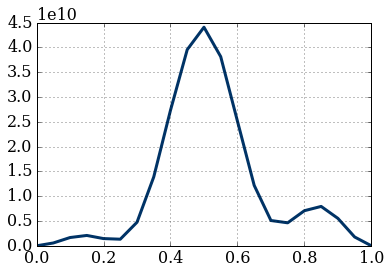

In [13]:
pyplot.plot(x, probfunc_real, color='#003366', ls='-', lw=3);
pyplot.grid(True)


In [14]:
def psi_analytical(x, t, n_max, h, m, L, hbar):
    
    psi = 0
    for n in range (1, n_max+1):
        
        E = ((n**2)*(h**2))/(8*m*(L**2))
        
        summation = numpy.sqrt(2/L)*numpy.sin(n*numpy.pi*x/L)*numpy.exp(-1j*E*t/hbar)
        psi+= summation
        
    return psi


In [15]:
psi_analytical = psi_analytical(x, dt*nt, 1, h, m, L, hbar)
print(psi_analytical)

[  0.00000000e+00 +0.00000000e+00j   2.21231742e-01 -1.73221532e-10j
   4.37016024e-01 -3.42177775e-10j   6.42039522e-01 -5.02708466e-10j
   8.31253876e-01 -6.50860805e-10j   1.00000000e+00 -7.82986792e-10j
   1.14412281e+00 -8.95833045e-10j   1.26007351e+00 -9.86620916e-10j
   1.34499702e+00 -1.05311491e-09j   1.39680225e+00 -1.09367771e-09j
   1.41421356e+00 -1.10731054e-09j   1.39680225e+00 -1.09367771e-09j
   1.34499702e+00 -1.05311491e-09j   1.26007351e+00 -9.86620916e-10j
   1.14412281e+00 -8.95833045e-10j   1.00000000e+00 -7.82986792e-10j
   8.31253876e-01 -6.50860805e-10j   6.42039522e-01 -5.02708466e-10j
   4.37016024e-01 -3.42177775e-10j   2.21231742e-01 -1.73221532e-10j
   1.73191211e-16 -1.35606431e-25j]


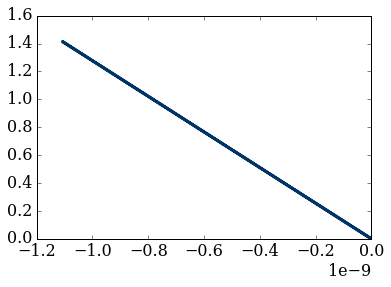

In [16]:
pyplot.plot(psi_analytical.imag, psi_analytical.real, color = '#003366', ls = '-', lw =3)

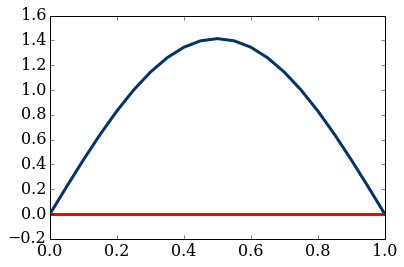

In [17]:
pyplot.plot(x, psi_analytical.real, color = '#003366', ls = '-', lw =3)
pyplot.plot(x, psi_analytical.imag, color = 'r', ls = '-', lw =3)

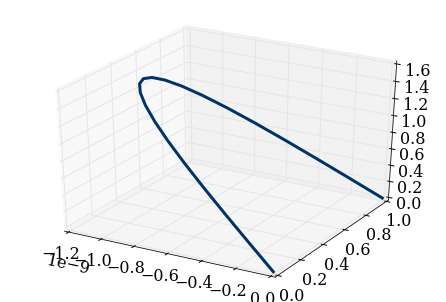

In [18]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.view_init()

ax.plot(psi_analytical.imag, x, psi_analytical.real, color = '#003366', lw =3)
#ax = pyplot.axes(xlabel=('x'),ylabel=('Real'), zlabel=('Imaginary'));#

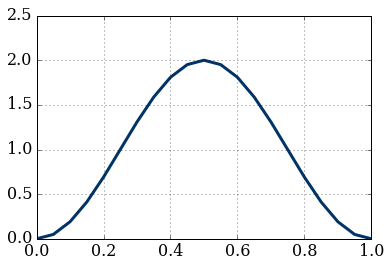

In [19]:
probfunc_analytical = numpy.conj(psi_analytical)*psi_analytical
pyplot.plot(x, probfunc_analytical.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)